In [11]:
#!pip install dtreeviz

In [12]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import dtreeviz
import graphviz
import graphviz.backend as be
from IPython.display import Image, display_svg, SVG
import warnings
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

In [13]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.font_manager
fm = matplotlib.font_manager
fm._get_fontconfig_fonts.cache_clear()
plt.rcParams['font.family'] = 'Times New Roman'

## Loading data

In [14]:
df= pd.read_csv('../data/cleaned/data_without_outlier.csv')
df

,sqft_above,sqft_lot15,sqft_living15,waterfront,view,condition,grade,bedrooms,bathrooms,sqft_basement_cat,floors,yr_built_cat,zip,price
0,1180.0,5650.0,1340.0,0,0,3,7,3,1.00,1,1.0,1,1,221900
1,2170.0,7639.0,1690.0,0,0,3,7,3,2.25,2,2.0,1,1,538000
2,770.0,8062.0,2720.0,0,0,3,6,2,1.00,1,1.0,1,0,180000
3,1050.0,5000.0,1360.0,0,0,5,7,4,3.00,3,1.0,1,1,604000
4,1680.0,7503.0,1800.0,0,0,3,8,3,2.00,1,1.0,1,0,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18853,1530.0,1509.0,1530.0,0,0,3,10,6,3.25,1,2.0,1,0,925850
18854,2310.0,7200.0,1830.0,0,0,4,7,2,1.00,2,1.0,1,0,255500
18855,1020.0,2007.0,1020.0,0,0,3,10,3,2.50,1,2.0,1,0,450000
18856,1600.0,1287.0,1410.0,0,0,3,7,3,1.00,1,1.0,1,0,280000


Part of the management objectives was for properties above 650k. so we will model for properties above 650k

In [15]:
#filter out properties above 650k
df = df[df['price'] > 650000]
df.shape

(4440, 14)

In [16]:
#divide x and y
X = df.drop(columns=["price", 'bathrooms'])
y = df["price"]


In [17]:
X.columns

Index(['sqft_above', 'sqft_lot15', 'sqft_living15', 'waterfront', 'view',
       'condition', 'grade', 'bedrooms', 'sqft_basement_cat', 'floors',
       'yr_built_cat', 'zip'],
      dtype='object')

we will power transform our X dataset

In [18]:

from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer()
pt.fit(X)

PowerTransformer()

In [19]:
X_transformed= pt.transform(X)
X= pd.DataFrame(X_transformed, columns=X.columns)

In [20]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
sqft_above,4440.0,1.971596e-15,1.000113,-3.658514,-0.695724,-0.064583,0.752312,2.167931
sqft_lot15,4440.0,-6.081222e-16,1.000113,-2.511587,-0.624422,0.099021,0.627636,2.827702
sqft_living15,4440.0,-1.014604e-14,1.000113,-3.259428,-0.733473,-0.028340,0.736961,2.279062
waterfront,4440.0,8.001607e-18,1.000113,-0.169500,-0.169500,-0.169500,-0.169500,5.899699
view,4440.0,-4.480900e-17,1.000113,-0.594506,-0.594506,-0.594506,1.424433,1.766126
condition,4440.0,-5.561117e-15,1.000113,-14.578344,-0.742176,-0.742176,0.878914,1.751349
grade,4440.0,-2.921387e-15,1.000113,-3.898642,-0.617208,0.217513,0.966335,2.834762
bedrooms,4440.0,1.358673e-15,1.000113,-4.293049,-0.923641,0.274731,0.274731,5.011456
sqft_basement_cat,4440.0,-8.161640e-17,1.000113,-0.975298,-0.975298,0.204990,0.870583,1.306686
floors,4440.0,-9.045817e-16,1.000113,-1.360868,-1.360868,0.645662,0.645662,3.867528


standard normalization to my dataset  to bound them between [0,1] or [1,-1]

In [21]:
from sklearn.preprocessing import minmax_scale
X_scaled= minmax_scale(X)
X= pd.DataFrame(X_scaled, columns=X.columns)
X.describe().T

,count,mean,std,min,25%,50%,75%,max
sqft_above,4440.0,0.627915,0.171651,0.0,0.508507,0.616831,0.757036,1.0
sqft_lot15,4440.0,0.470397,0.187312,0.0,0.353449,0.488943,0.587948,1.0
sqft_living15,4440.0,0.588505,0.180575,0.0,0.456073,0.583388,0.721567,1.0
waterfront,4440.0,0.027928,0.164785,0.0,0.000000,0.000000,0.000000,1.0
view,4440.0,0.251842,0.423663,0.0,0.000000,0.000000,0.855254,1.0
condition,4440.0,0.892751,0.061245,0.0,0.847301,0.847301,0.946574,1.0
grade,4440.0,0.579000,0.148530,0.0,0.487337,0.611304,0.722514,1.0
bedrooms,4440.0,0.461395,0.107487,0.0,0.362127,0.490921,0.490921,1.0
sqft_basement_cat,4440.0,0.427390,0.438265,0.0,0.000000,0.517220,0.808893,1.0
floors,4440.0,0.260284,0.191285,0.0,0.000000,0.383776,0.383776,1.0


In [22]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
sqft_above,4440.0,0.627915,0.171651,0.0,0.508507,0.616831,0.757036,1.0
sqft_lot15,4440.0,0.470397,0.187312,0.0,0.353449,0.488943,0.587948,1.0
sqft_living15,4440.0,0.588505,0.180575,0.0,0.456073,0.583388,0.721567,1.0
waterfront,4440.0,0.027928,0.164785,0.0,0.000000,0.000000,0.000000,1.0
view,4440.0,0.251842,0.423663,0.0,0.000000,0.000000,0.855254,1.0
condition,4440.0,0.892751,0.061245,0.0,0.847301,0.847301,0.946574,1.0
grade,4440.0,0.579000,0.148530,0.0,0.487337,0.611304,0.722514,1.0
bedrooms,4440.0,0.461395,0.107487,0.0,0.362127,0.490921,0.490921,1.0
sqft_basement_cat,4440.0,0.427390,0.438265,0.0,0.000000,0.517220,0.808893,1.0
floors,4440.0,0.260284,0.191285,0.0,0.000000,0.383776,0.383776,1.0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

# We need to cast again into df to visualize the decision tree
X_train_df = pd.DataFrame(X_train, columns=X.columns)
#y_train_df = pd.DataFrame(y_train, columns=["Price"])

X_test_df = pd.DataFrame(X_test, columns=X.columns)
#y_test_df = pd.DataFrame(y_test, columns=["Price"])

In [24]:
X_train_df

,sqft_above,sqft_lot15,sqft_living15,waterfront,view,condition,grade,bedrooms,sqft_basement_cat,floors,yr_built_cat,zip
1402,0.844779,0.557826,0.654029,0.0,0.000000,0.847301,0.611304,0.490921,0.000000,0.383776,0.954788,0.0
1621,0.496678,0.353449,0.424761,0.0,0.000000,1.000000,0.347461,0.490921,0.808893,0.188646,0.000000,1.0
3402,0.839862,0.473907,0.962396,0.0,0.960151,1.000000,0.487337,0.362127,0.808893,0.383776,0.000000,1.0
2838,0.910205,0.578642,0.888660,0.0,0.000000,1.000000,0.487337,0.490921,0.808893,0.000000,0.000000,0.0
2105,0.674571,0.511615,0.565930,0.0,0.000000,0.847301,0.611304,0.490921,0.000000,0.383776,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0.382037,0.321925,0.505906,0.0,0.000000,1.000000,0.487337,0.600937,1.000000,0.383776,0.000000,1.0
2763,0.735857,0.479674,0.797439,0.0,1.000000,0.847301,0.915321,0.490921,1.000000,0.000000,0.954788,0.0
905,0.431771,0.627903,0.329612,0.0,0.000000,0.847301,0.487337,0.362127,0.517220,0.000000,0.000000,0.0
3980,0.729266,0.221067,0.381705,0.0,1.000000,0.847301,0.611304,0.205120,0.000000,0.383776,0.000000,0.0


let´s use grid search to find a better performance

In [25]:
from sklearn.model_selection import GridSearchCV

max_depth_choices = [3,5] # max_depth lists to try
criterion_choices = ['squared_error','absolute_error'] # possible values optimization metrics list
min_samples_split_choices = [2,10] # list of possible values of min_samples_split to try
min_samples_leaf_choices = [2,10] # list of the possible values of min_samples_leaf to try

In [26]:
#create grid, which is a dictionary with hyperparameters
grid = {'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}

In [27]:
model = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5)

In [28]:
#fit
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 5], 'min_samples_leaf': [2, 10],
                         'min_samples_split': [2, 10]})

In [29]:
#best r2
print("The best R2 for the best hyperparameters is {:.2f}".format(grid_search.best_score_))

The best R2 for the best hyperparameters is 0.46


In [30]:
print("The performace of the DecisionTree using the best gridsearchcv hyperpameters is {:.2f}".format(grid_search.best_estimator_.score(X_test, y_test)))

The performace of the DecisionTree using the best gridsearchcv hyperpameters is 0.48


In [31]:
#see the best parameter
grid_search.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

check random search

In [32]:
import numpy as np

In [33]:
from sklearn.model_selection import RandomizedSearchCV

max_depth_choices= np.random.randint(low=1, high=len(X.columns), size=3) # A random integer between 1 and the number of columns
criterion_choices =  ['squared_error','absolute_error'] # A list of the possible values optimization metrics
min_samples_split_choices = np.random.randint(low=2, high=10, size=3) # A random integer between 1 and the number of columns
min_samples_leaf_choices = np.random.randint(low=2, high=10, size=3) # A random integer between 1 and the number of columns
max_features_choices = np.random.randint(low=1, high=len(X.columns), size=3) # A random integer between 1 and the number of columns

random_grid = {'max_depth': max_depth_choices,
               'criterion': criterion_choices,
               'min_samples_split': min_samples_split_choices,
               'min_samples_leaf': min_samples_leaf_choices,
               'max_features': max_features_choices}

In [34]:
model = DecisionTreeRegressor()
# n_iter is how many random combinations of hyperparameters will test use the computer.
random_search = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter=25, cv = 5, n_jobs = 2)

In [35]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=25, n_jobs=2,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': array([11,  4,  7]),
                                        'max_features': array([ 5, 10,  5]),
                                        'min_samples_leaf': array([6, 6, 4]),
                                        'min_samples_split': array([6, 5, 7])})

In [36]:
random_search.best_params_

{'min_samples_split': 6,
 'min_samples_leaf': 6,
 'max_features': 10,
 'max_depth': 7,
 'criterion': 'squared_error'}

In [37]:
print("The best R2 according to the random search is {:.2f}".format(random_search.best_score_))

The best R2 according to the random search is 0.46


In [38]:
#let´s use this model
model = DecisionTreeRegressor (min_samples_split= 10,
                               min_samples_leaf= 8,
                               max_features= 8,
                               max_depth= 9,
                               criterion= 'squared_error')


In [39]:
model.fit(X_train, y_train)
model.score(X_test, y_test).round(2)

0.43

so far it had produced the best R2 score at 0.63 for the test data, a litle above the score from randomized search . and for train set
:

In [40]:
model.score(X_train, y_train).round(2)

0.6

let´s see the most relevant features

In [41]:
#obtain dataframe with feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False)


,feature,importance
6,grade,0.547290
3,waterfront,0.157474
8,sqft_basement_cat,0.109106
4,view,0.035407
7,bedrooms,0.034443
1,sqft_lot15,0.025223
2,sqft_living15,0.023610
11,zip,0.018785
9,floors,0.017731
5,condition,0.015626


In [52]:
#export feature importance to csv
feature_importance.to_csv('../data/cleaned/feature_importance_without_outlier.csv', index=False)

In [42]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [43]:
y_train_pred = [round(value, 2) for value in y_train_pred]
y_test_pred= [round(value, 2) for value in y_test_pred]

# Create a dictionary with the results
results = {
    "Set": ["Train"] * len(X_train) + ["Test"] * len(X_test),
    "Real": list(y_train) + list(y_test),
    "Predicted": y_train_pred + y_test_pred
}

# Create the results DataFrame
results_df = pd.DataFrame(results)
results_df

,Set,Real,Predicted
0,Train,705000,817326.85
1,Train,735000,720575.39
2,Train,1030000,881666.67
3,Train,1110000,768752.82
4,Train,894000,817326.85
...,...,...,...
4435,Test,661000,817326.85
4436,Test,820000,795568.66
4437,Test,790000,817326.85
4438,Test,1150000,2298181.82


In [44]:
results_df.columns

Index(['Set', 'Real', 'Predicted'], dtype='object')

In [45]:
results_df['Errors'] = results_df['Real'] - results_df['Predicted']
results_df.head()

,Set,Real,Predicted,Errors
0,Train,705000,817326.85,-112326.85
1,Train,735000,720575.39,14424.61
2,Train,1030000,881666.67,148333.33
3,Train,1110000,768752.82,341247.18
4,Train,894000,817326.85,76673.15


In [46]:
results_df.shape

(4440, 4)

In [47]:
#select only rows where real is greater than 1000000
results_df2 = results_df[results_df['Real'] > 1000000]
results_df2.head()

,Set,Real,Predicted,Errors
2,Train,1030000,881666.67,148333.33
3,Train,1110000,768752.82,341247.18
6,Train,1050000,1051783.55,-1783.55
8,Train,2150000,1866250.00,283750.00
9,Train,1700000,1601818.18,98181.82


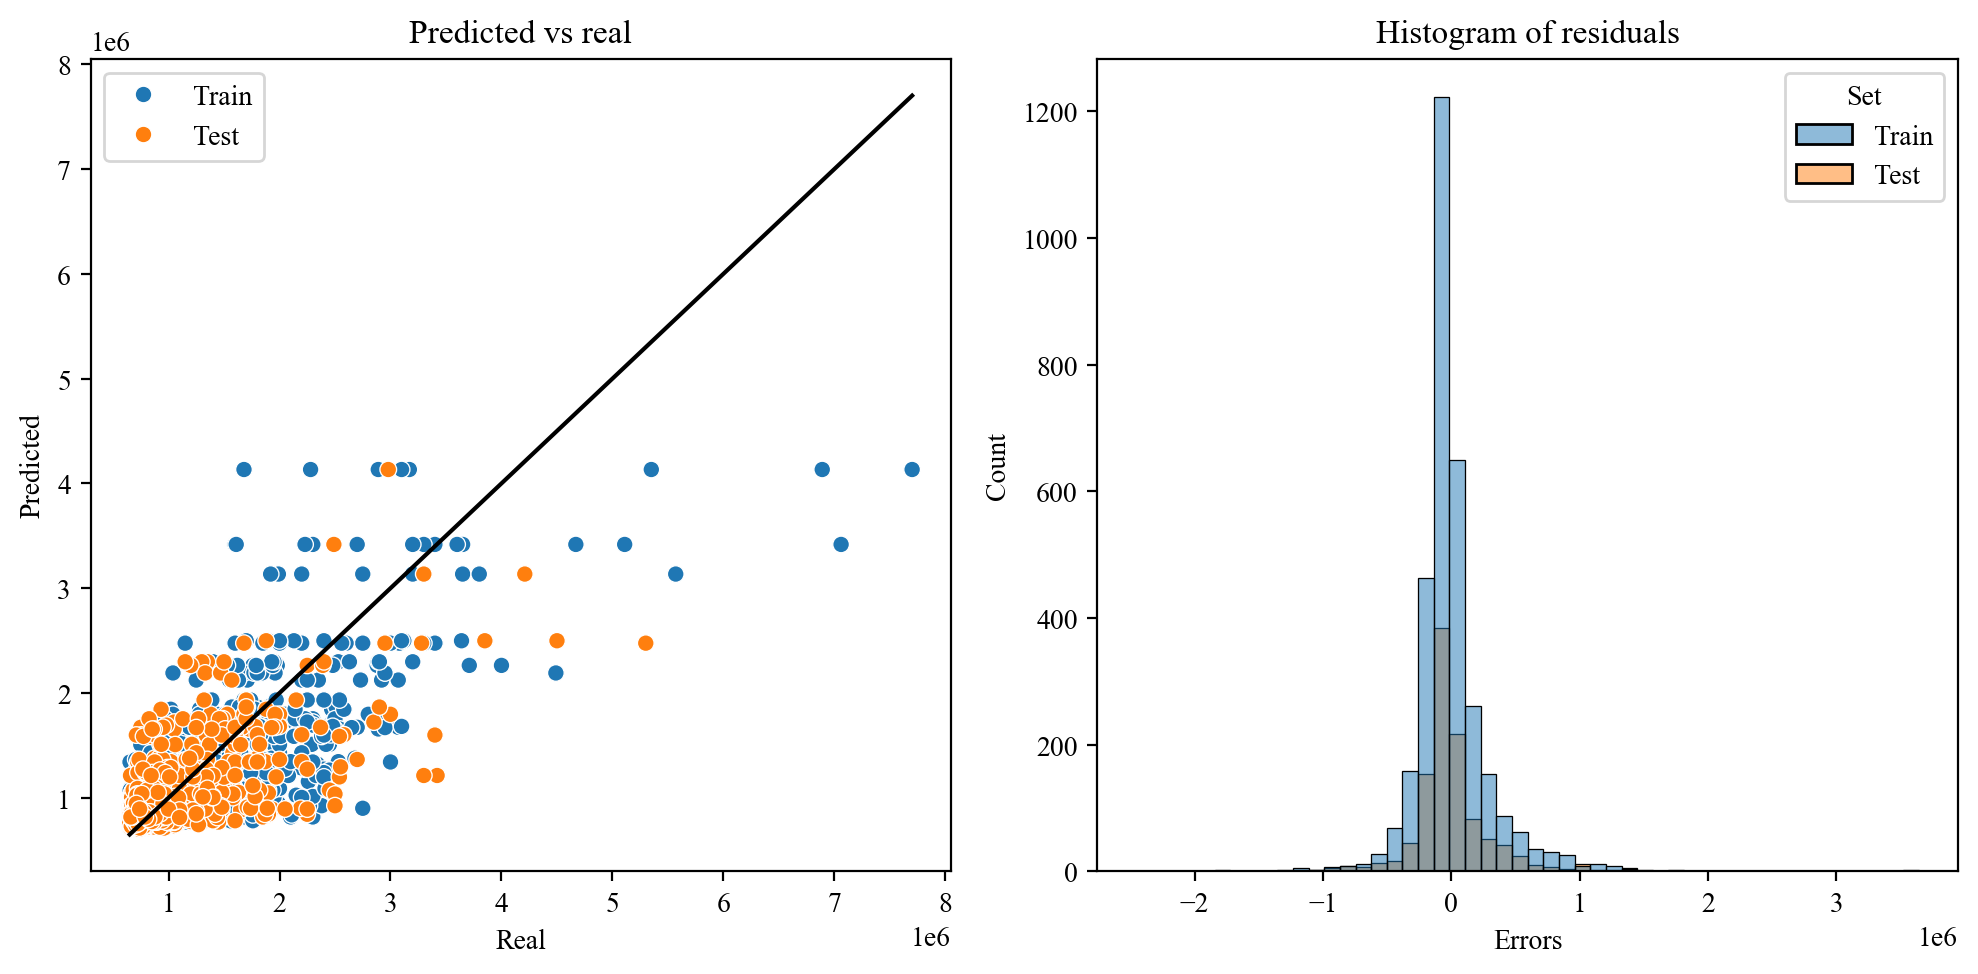

In [48]:
#visualize real and predicted
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.scatterplot(data=results_df, x="Real", y="Predicted", hue="Set", ax=ax[0])
sns.lineplot(data=results_df, x="Real", y="Real", color="black", ax=ax[0])
ax[0].set_title("Predicted vs real")
sns.histplot(results_df, x="Errors", bins=50, hue="Set", ax=ax[1])
ax[1].set_title("Histogram of residuals")

plt.tight_layout()
plt.show()

In [49]:
#test for mae, mse, rmse, r2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [50]:
def error_metrics_report(y_real_train: list, y_real_test: list, y_pred_train: list, y_pred_test: list) -> pd.DataFrame:
    '''
   The error metrics report function calculates for regression.

    Parameters:
    - y_real_train (list): The actual target values for the training dataset.
    - y_real_test (list): The actual target values for the testing dataset.
    - y_pred_train (list): The predicted target values for the training dataset.
    - y_pred_test (list): The predicted target values for the testing dataset.

    Returns:
    - metrics_df (DataFrame): A Pandas DataFrame containing error metrics for both the training and testing datasets.
    - 'Metric' (str): The name of the error metric.
    - 'Training Set' (float): The error metric value for the training set.
    - 'Testing Set' (float): The error metric value for the testing set.
    '''

    MAE_train = mean_absolute_error(y_real_train, y_pred_train)
    MAE_test  = mean_absolute_error(y_real_test, y_pred_test)

    # Mean squared error
    MSE_train = mean_squared_error(y_real_train, y_pred_train)
    MSE_test  = mean_squared_error(y_real_test, y_pred_test)

    # Root mean squared error
    RMSE_train = mean_squared_error(y_real_train, y_pred_train)
    RMSE_test  = mean_squared_error(y_real_test, y_pred_test)

    # R2
    R2_train = r2_score(y_real_train, y_pred_train)
    R2_test  = r2_score(y_real_test, y_pred_test)

    results = {"Metric":['MAE', 'MSE', 'RMSE', 'R2'] , 
               "Train": [MAE_train, MSE_train, RMSE_train, R2_train],
               "Test":  [MAE_test, MSE_test, RMSE_test, R2_test]}

    results_df = pd.DataFrame(results).round(2)

    pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))


    return results_df

In [51]:
error_metrics_report(list(results_df[results_df["Set"]=="Train"]["Real"]),
                     list(results_df[results_df["Set"]=="Test"]["Real"]),
                     list(results_df[results_df["Set"]=="Train"]["Predicted"]),
                     list(results_df[results_df["Set"]=="Test"]["Predicted"]))



,Metric,Train,Test
0,MAE,186987.25,206595.54
1,MSE,96577861950.05,118427795666.44
2,RMSE,96577861950.05,118427795666.44
3,R2,0.60,0.43


In [54]:
#make error metrics report a dataframe
error_metrics_df = error_metrics_report(list(results_df[results_df["Set"]=="Train"]["Real"]),
                                        list(results_df[results_df["Set"]=="Test"]["Real"]),
                                        list(results_df[results_df["Set"]=="Train"]["Predicted"]),
                                        list(results_df[results_df["Set"]=="Test"]["Predicted"]))

In [55]:
#export error metrics to csv
error_metrics_df.to_csv('../data/cleaned/error_metrics_without_outlier_for650k.csv', index=False)